<a href="https://colab.research.google.com/github/flaviarbatista/Assignments/blob/main/Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 7: House Price Prediction Using Boston Housing Data**
### **Name:** Flavia Batista
### **Course:** Data Analytics and Business Intelligence Analyst
### **Institution:** Willis College

## **Assignment Supervised machine Learning - Regression**

### **_House Price Prediction Using Bolton Housing Data_**
This dataset provides information about house prices in Bolton. House Price Prediction


**In this notebook, you'll follow the basic machine learning process to build a regression model to predict house prices using the "Boston Housing Dataset" from sklearn. The regression model will either be a Decision Tree or Random Forest regressor.**



---



### **Follow the instructions and complete each TODO to complete the assessment on the essential steps in building and evaluating a regression model.**


The following is a description of each column in the dataset:

Dataset Features (Bolton Housing):

* CRIM: Crime rate by town
* ZN: Proportion of residential land zoned for large lots
* INDUS: Proportion of non-retail business acres per town
* CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX: Nitric oxide concentration (parts per 10 million)
* RM: Average number of rooms per dwelling
* AGE: Proportion of owner-occupied units built before 1940
* DIS: Weighted distances to five Boston employment centers
* RAD: Index of accessibility to radial highways
* TAX: Full-value property tax rate per `$10,000`
* PTRATIO: Pupil-teacher ratio by town
* B: Proportion of Black population
* LSTAT: Percentage of lower status of the population
* MEDV (Target): Median value of owner-occupied homes in `$1,000s`



**Dataset is from sklearn Datasets**

## Set Up Git

In [1]:
!apt-get install -y git
!git config --global user.email "flavia.bi.progress@gmail.com"
!git config --global user.name "flaviarbatista"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.15).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [2]:
import getpass, os
token = getpass.getpass('Token')
os.environ['GHTOKEN'] = token

Token··········


## Mount Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Inspect

In [4]:
!ls "/content/drive/MyDrive/Willis College/12- Introduction to Artificial Intelligence/Assignments/Assignment 7"

'Assignment 7.ipynb'


## Clone the Repository

In [5]:
!git clone https://github.com/flaviarbatista/Assignments.git

Cloning into 'Assignments'...
remote: Enumerating objects: 140, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 140 (delta 18), reused 0 (delta 0), pack-reused 107 (from 2)
Receiving objects: 100% (140/140), 4.09 MiB | 9.55 MiB/s, done.
Resolving deltas: 100% (80/80), done.


## Import necessary libraries
### **TODO: Import all the necessary libraries for data handling, visualization, and model building.**

In [6]:
# --- Imports necessary libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

print("Libraries imported successfully!")

Libraries imported successfully!


## --- Data Collection and Loading ---
### **TODO: Load the 'Boston Housing' dataset from sklearn and convert it into a pandas DataFrame.**
- Hint: Use `load_boston()` from `sklearn.datasets`


### Load dataset and convert to DataFrame:

### **Data Loading Note: Ethical Deprecation of load_boston()**

It is important to note that when attempting to load the 'Boston Housing Dataset' using the standard `from sklearn.datasets import load_boston`, an `ImportError` occurs.

This is because the `load_boston` function has been **removed** from scikit-learn (since version 1.2) due to ethical concerns regarding one of its features ("B"), which was derived in a way that perpetuated racial bias in house price modeling.

To fulfill the assignment requirement of using the **Boston Housing Dataset**, I am using the **manual loading method** suggested in the traceback error. This method fetches the raw data directly from the original source URL and manually assembles the features and the target into the required pandas DataFrame.

 Variables in order:
-  `CRIM`     per capita crime rate by town
- `ZN`       proportion of residential land zoned for lots over 25,000 sq.ft.
- `INDUS`    proportion of non-retail business acres per town
- `CHAS`     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- `NOX`      nitric oxides concentration (parts per 10 million)
- `RM`       average number of rooms per dwelling
- `AGE`      proportion of owner-occupied units built prior to 1940
- `DIS`      weighted distances to five Boston employment centres
- `RAD`      index of accessibility to radial highways
- `TAX`      full-value property-tax rate per 10000
- `PTRATIO`  pupil-teacher ratio by town
- `B`       1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- `LSTAT`    % lower status of the population
- `MEDV`     Median value of owner-occupied homes in $1000's

In [7]:
# --- Data Collection and Loading (Manual Method due to Deprecation) ---

# URL for the Boston Housing dataset (used to bypass deprecated sklearn function)
data_url = "http://lib.stat.cmu.edu/datasets/boston"

# Read the raw data, which requires special handling due to its spaced format
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)

# Manually assemble the features (data) and the target (target) from the two-line format
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Define the feature names
feature_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
]

# Convert the data into the final DataFrame
df = pd.DataFrame(data, columns=feature_names)

# Add the target variable (MEDV - Median Value of owner-occupied homes in $1000s)
df['MEDV'] = target

print("Boston Housing Dataset loaded successfully into DataFrame 'df' using manual URL fetch!")

Boston Housing Dataset loaded successfully into DataFrame 'df' using manual URL fetch!


## --- Quick Check of Data ---
### **TODO: Display the first few rows of the dataset to understand its structure.**
- Hint: Use `.head()` to inspect the first few rows.

In [8]:
# --- Quick Check of Data ---
print("--- First few rows of the dataset ---\n")
df.head()

--- First few rows of the dataset ---



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### **TODO: Check the features and target variable. Identify which is continuous and categorical if applicable.**
- Hint: Use `.info()` and `.describe()` to inspect data types and statistical properties.

In [9]:
print("\n--- Data Information (Types, Non-Null Counts) ---\n")
df.info()


--- Data Information (Types, Non-Null Counts) ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [10]:
# Display statistical properties
print("\n--- Descriptive Statistics --\n")
df.describe().T


--- Descriptive Statistics --



,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### --- Feature and Target Analysis ---
The target variable (MEDV) is continuous (house price).
All feature variables (e.g., CRIM, ZN, INDUS, RM) are continuous, except for CHAS (Charles River dummy variable), which is categorical/binary (0 or 1).

## --- EDA and Data Preprocessing ---
### **TODO: Check for missing/null values.**
- Hint: Use `.isnull().sum()` to check for null values.

In [11]:
print("--- Missing Values Check ---\n")
df.isnull().sum()

--- Missing Values Check ---



,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


### **TODO: Visualize the data. Create scatter plots to see the relationship between independent features and the target variable.**
- Example: Use `plt.scatter()` to visualize the relationship between features like 'RM' (average number of rooms) and the target `MEDV`.

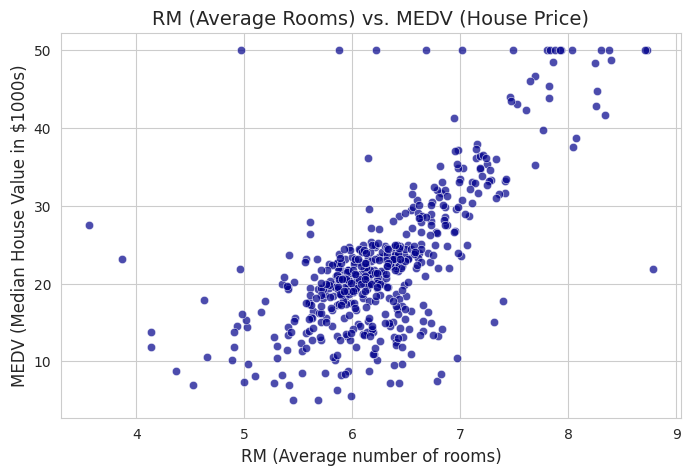

In [12]:
# Create a scatter plot for 'RM' vs. 'MEDV'
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['RM'], y=df['MEDV'], alpha=0.7, color='darkblue')
plt.title('RM (Average Rooms) vs. MEDV (House Price)', fontsize=14)
plt.xlabel('RM (Average number of rooms)', fontsize=12)
plt.ylabel('MEDV (Median House Value in $1000s)', fontsize=12)
plt.show()

### **TODO: Create a function to automate scatter plots for all features vs the target variable.**
- Hint: The function should loop over a list of features and plot scatter plots for each.

In [14]:
# --- Automated Scatter Plot Function ---

def plot_all_features_vs_target(dataframe, target_col):
    """
    Automates the generation of scatter plots for ALL independent features
    against the target variable.
    """

    # 1. Identify the features (X columns) by excluding the target (y='MEDV').
    features = dataframe.columns.drop(target_col)

    print(f"Starting automation: Generating {len(features)} scatter plots...\n")

    # 2. The 'for' loop is the automation engine. It repeats the process for every feature.
    for feature in features:

        # Create a new figure (plot canvas) for the current graph.
        plt.figure(figsize=(7, 5))

        # Draw the scatter plot: X = Current Feature, Y = Target.
        sns.scatterplot(x=dataframe[feature], y=dataframe[target_col], alpha=0.7)

        # Set titles and labels for clarity.
        plt.title(f'{feature} vs {target_col}', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel(f'{target_col} (House Price in $1000s)', fontsize=12)

        # Display the plot.
        plt.show()

print("Function plot_all_features_vs_target was created successfully!")

Function plot_all_features_vs_target was created successfully!


### **TODO: Use the function to visualize the relationships between multiple features and the target variable.**
- Example: `RM`, `LSTAT`, `AGE`, `CRIM`
- Target: `MEDV`

Starting automation: Generating 13 scatter plots...



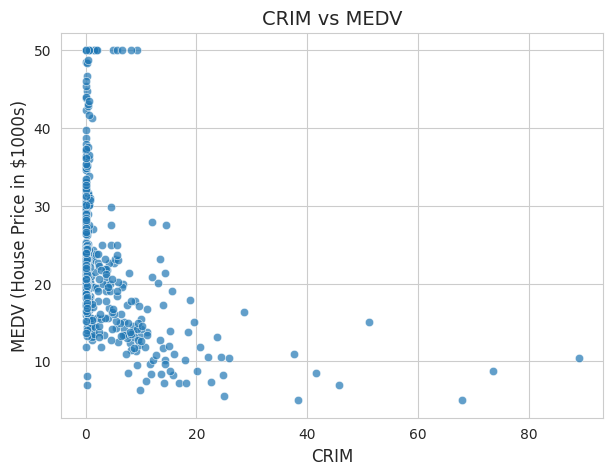

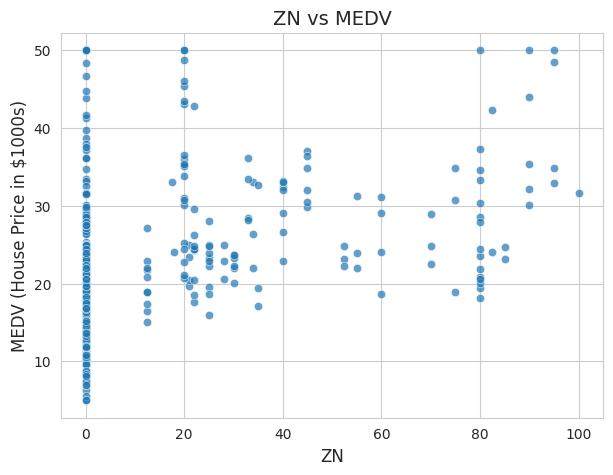

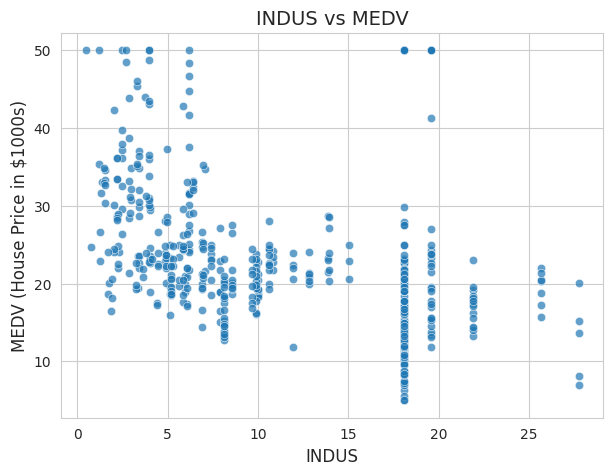

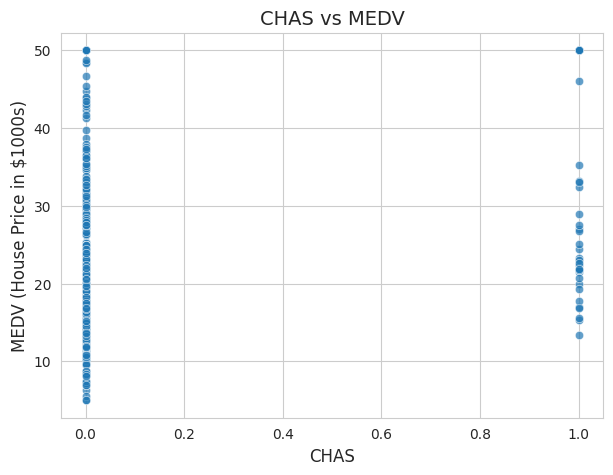

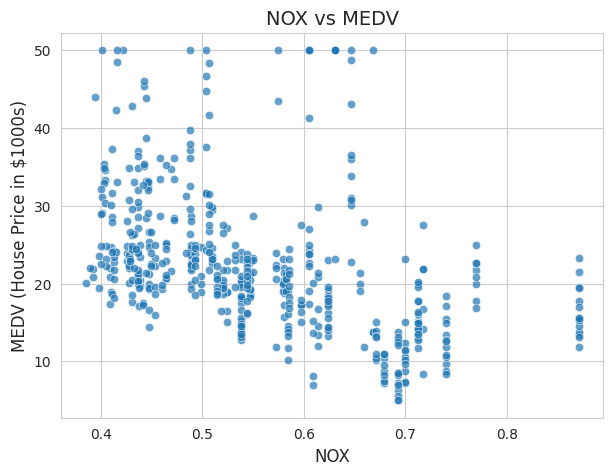

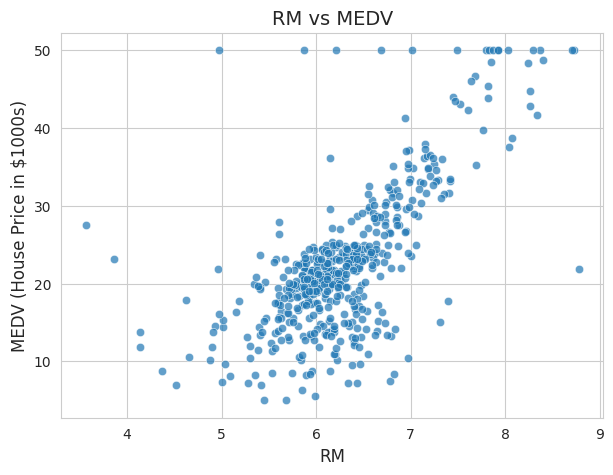

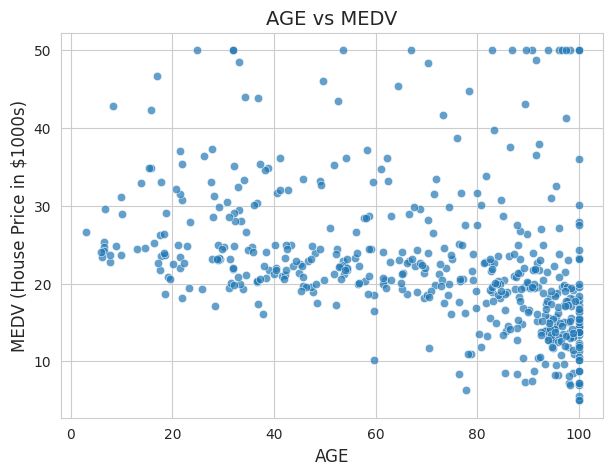

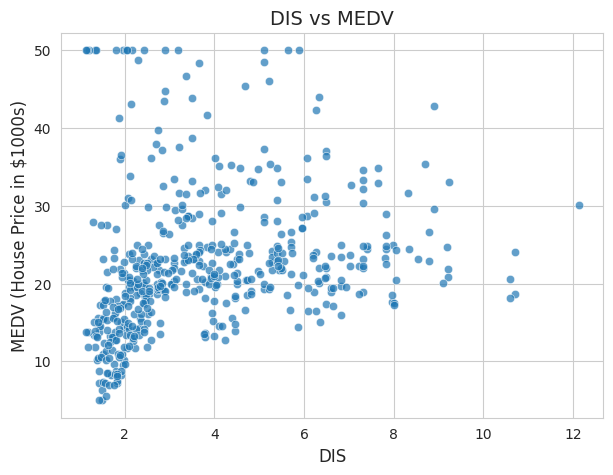

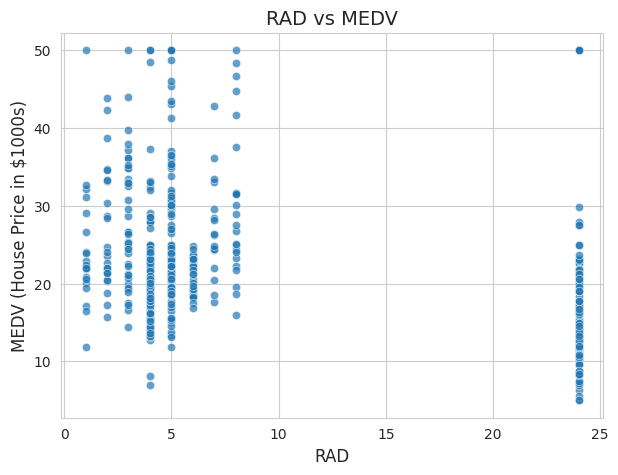

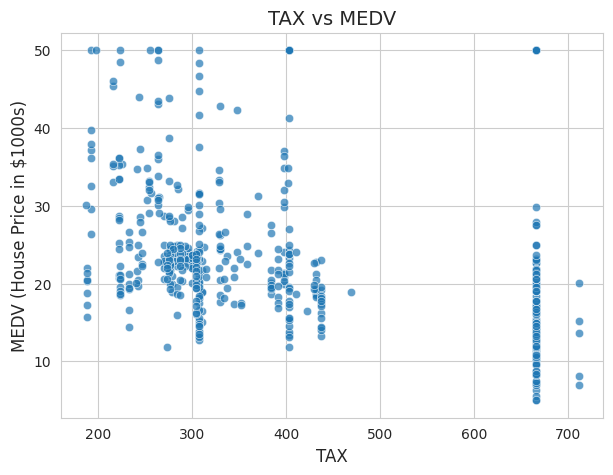

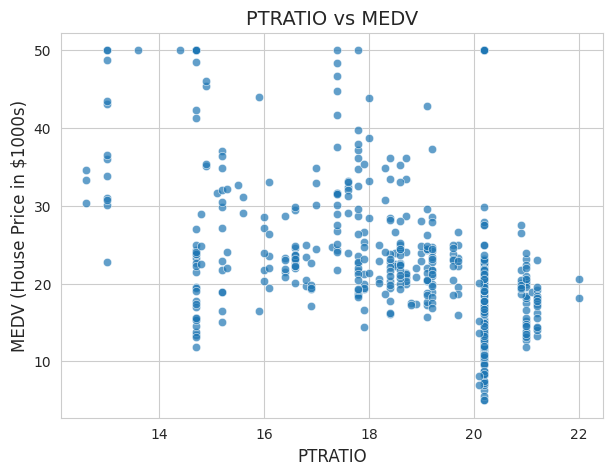

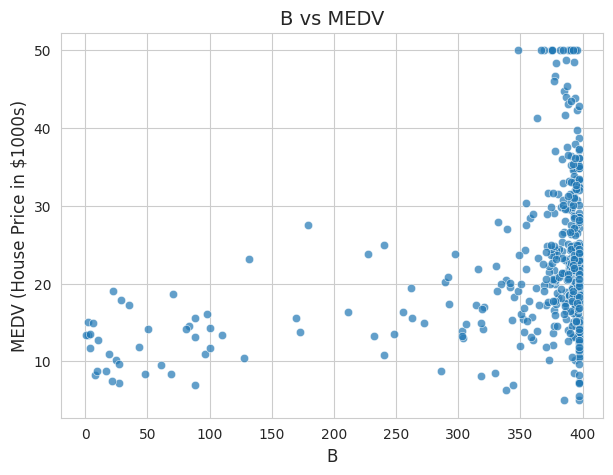

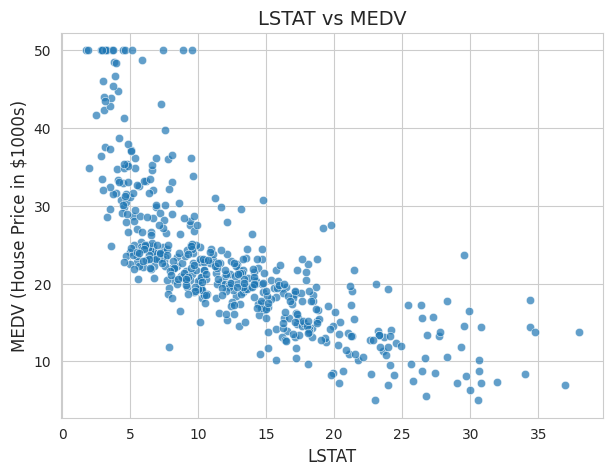

In [31]:
# Use the function to visualize all relationships
plot_all_features_vs_target(df, 'MEDV')

## --- ML Model Training ---
### **TODO: Split the dataset into training and testing sets.**
- Hint: Use `train_test_split()` from `sklearn.model_selection` with an 80/20 split.

In [16]:
# Define X (features) and y (target) and perform the train-test split.

# The target variable for Boston Housing is 'MEDV' (Median house value).
X = df.drop('MEDV', axis=1) # X contains all features (CRIM, RM, LSTAT, etc.)
y = df['MEDV']             # y contains the target price (MEDV)

# 2. Split the Data into Training and Testing Sets
# 80% for training and 20% for testing (test_size=0.2).
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Data split successful!\n")
print(f"Training set size (80%): {X_train.shape[0]} samples")
print(f"Testing set size (20%): {X_test.shape[0]} samples")

Data split successful!

Training set size (80%): 404 samples
Testing set size (20%): 102 samples


### **TODO: Choose an appropriate regression model: Decision Tree or Random Forest.**
- Hint: Use either `DecisionTreeRegressor` or `RandomForestRegressor` from `sklearn.tree` or `sklearn.ensemble`.

In [17]:
# Define your regression model here: Choose Random Forest Regressor (it's generally more robust than a single Decision Tree).
rf_model = RandomForestRegressor(random_state=42)
print("Regression model chosen: Random Forest")

Regression model chosen: Random Forest


### **TODO: Train the model on the training data.**
- Hint: Use `.fit()` to train the model.

In [18]:
rf_model.fit(X_train, y_train)
print("Random Forest Regressor model trained successfully!")

Random Forest Regressor model trained successfully!


## --- Model Evaluation ---
### **TODO: Evaluate the performance of the model on the test set using relevant metrics (e.g., RMSE, R-squared).**
- Hint: Use `mean_squared_error()` and `r2_score()` from `sklearn.metrics`.
- Perform parameter tuning on the model if needed to improve the performance of your model.

In [19]:
# Predict on the test set using the initial model
y_pred_initial = rf_model.predict(X_test)

# Calculate initial metrics
rmse_initial = np.sqrt(mean_squared_error(y_test, y_pred_initial))
r2_initial = r2_score(y_test, y_pred_initial)

print("--- Initial Model Performance ---\n")
print(f"RMSE (Initial): {rmse_initial:.3f}")
print(f"R-squared (Initial): {r2_initial:.3f}\n")

--- Initial Model Performance ---

RMSE (Initial): 2.811
R-squared (Initial): 0.892



In [20]:
# --- Perform parameter tuning on the model using GridSearchCV ---

print("\n--- Parameter Tuning using GridSearchCV ---")
print("Action: Searching for the optimal combination of hyperparameters for performance improvement.\n")

# Define a small, simple parameter grid to test, focusing on key parameters.
param_grid = {
    'n_estimators': [100, 200],  # Number of trees (default and one higher)
    'max_depth': [10, 20]       # Maximum depth of the trees
}

# Initialize GridSearchCV with simple settings.
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error', # Evaluation metric for the search
    cv=3, # Using 3-fold cross-validation (standard for small datasets)
    verbose=0,
    n_jobs=-1 # Use all available cores for faster execution
)

# Fit the search to the training data. This process finds the best settings.
grid_search.fit(X_train, y_train)

# Get the best model found by the search.
best_rf_model = grid_search.best_estimator_

print(f"Best Parameters Found: {grid_search.best_params_}\n")
print("GridSearchCV tuning completed successfully!")


--- Parameter Tuning using GridSearchCV ---
Action: Searching for the optimal combination of hyperparameters for performance improvement.

Best Parameters Found: {'max_depth': 10, 'n_estimators': 100}

GridSearchCV tuning completed successfully!


### Predict on the test set and calculate the evaluation metrics:

In [21]:
# Predict with the best-tuned model
y_pred_tuned = best_rf_model.predict(X_test)

# Calculate the final evaluation metrics (RMSE and R2)
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
r2_final = r2_score(y_test, y_pred_tuned)

print("\n--- Final Tuned Model Performance ---\n")
print(f"Final RMSE: {rmse_final:.3f}")
print(f"Final R-squared (R2): {r2_final:.3f}")


--- Final Tuned Model Performance ---

Final RMSE: 2.785
Final R-squared (R2): 0.894


## --- Model Prediction ---
### **TODO: Predict house prices from a new set of feature inputs.**
- Example new data: Use hypothetical or randomly generated values for the features.

- Example new data: CRIM = 0.2, ZN = 12.5, INDUS = 7.07, CHAS = 0, NOX = 0.5, RM = 6.5, AGE = 68, DIS = 4.0, RAD = 2, TAX = 250, PTRATIO = 17, B = 400, LSTAT = 12

In [22]:
# New data point: CRIM=0.2, ZN=12.5, INDUS=7.07, CHAS=0, NOX=0.5, RM=6.5, AGE=68, DIS=4.0, RAD=2, TAX=250, PTRATIO=17, B=400, LSTAT=12
new_data_point = pd.DataFrame(
    [[0.2, 12.5, 7.07, 0, 0.5, 6.5, 68, 4.0, 2, 250, 17, 400, 12]],
    columns=X_train.columns
)

# Use the best_rf_model to predict
predicted_price_thousands = best_rf_model.predict(new_data_point)[0]
predicted_price_usd = predicted_price_thousands * 1000

print("\n--- Model Prediction for New House Input ---\n")
print(f"Predicted Median House Value ($1000s): {predicted_price_thousands:.2f}")
print(f"Predicted Median House Value (USD): ${predicted_price_usd:,.2f}\n")


--- Model Prediction for New House Input ---

Predicted Median House Value ($1000s): 22.15
Predicted Median House Value (USD): $22,145.88



## Commit and Push Changes

In [23]:
%cd /content/Assignments

/content/Assignments


In [24]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [25]:
!git add --all

In [26]:
!git commit -m "Complete Assignment 7"

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [27]:
!git checkout

Your branch is up to date with 'origin/main'.


In [28]:
!git fetch origin
!git pull origin main

From https://github.com/flaviarbatista/Assignments
 * branch            main       -> FETCH_HEAD
Already up to date.


In [29]:
!git push https://$GHTOKEN@github.com/flaviarbatista/Assignments.git main

Everything up-to-date


In [30]:
os.environ.pop('GHTOKEN', None)
print("GHTOKEN removed from the session.")

GHTOKEN removed from the session.
